### Neural Network

In [2]:
import pandas as pd 

df_not_scaled = pd.read_csv('../data/not_scaled_data.csv')

In [11]:
from sklearn import metrics
import numpy as np

def calc_median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_metrics(y_pred, y_test):
    r2 = metrics.r2_score(y_test, y_pred)
    smse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mean_ae = metrics.mean_absolute_error(y_test, y_pred)
    mean_ape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    median_ae = metrics.median_absolute_error(y_test, y_pred)
    median_ape = calc_median_absolute_percentage_error(y_test, y_pred)
    return [r2, smse, mean_ae, mean_ape, median_ae, median_ape]
    
def within_x_percent(y_pred, y_test, x):
    return np.sum(np.abs((y_pred - y_test)/y_test) < x) / len(y_test) * 100

def show_metrics(y_pred, y_test, target_scaler = None, logarithm = False):        
    metrics_df = pd.DataFrame(columns=['Target', 'R2', 'Root Mean Squared Error', 'Mean Absolute Error',
                                            'Mean Absolute Percentage Error', 'Median Absolute Error', 'Median Absolute Percentage Error'])
    
    metrics_df.loc[0] = ['Target as it is'] + calculate_metrics(y_pred, y_test)
    
    if target_scaler:
        y_pred = target_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
        metrics_df.loc[1] = ['Scaled Target is inversed to real value'] + calculate_metrics(y_pred, y_test)

    
    if logarithm:
        y_pred = np.power(10, y_pred)
        y_test = np.power(10, y_test)
        metrics_df.loc[2] = ['Target -> 10 ^ Target'] + calculate_metrics(y_pred, y_test)
    
    dist_df = pd.DataFrame({"within 5%": [within_x_percent(y_pred, y_test, 0.05)],
                    "within 10%": [within_x_percent(y_pred, y_test, 0.10)],
                    "within 20%": [within_x_percent(y_pred, y_test, 0.20)],
                    "within 50%": [within_x_percent(y_pred, y_test, 0.50)],
                    "median absolute percentage error": [calc_median_absolute_percentage_error(y_test, y_pred)]}, index=['Percentage'])
        
    display(metrics_df)
    display(dist_df)

Epoch 1/50


c:\Users\ALI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6454 - val_loss: 0.3666
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3631 - val_loss: 0.3311
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3412 - val_loss: 0.3178
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3126 - val_loss: 0.3046
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3062 - val_loss: 0.3009
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3016 - val_loss: 0.2889
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2830 - val_loss: 0.2877
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2847 - val_loss: 0.2816
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2694 - val_loss: 0.2831
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2877 - val_loss: 0.2760
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2776 - val_loss: 0.2727
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2728 - val_loss: 0.2720


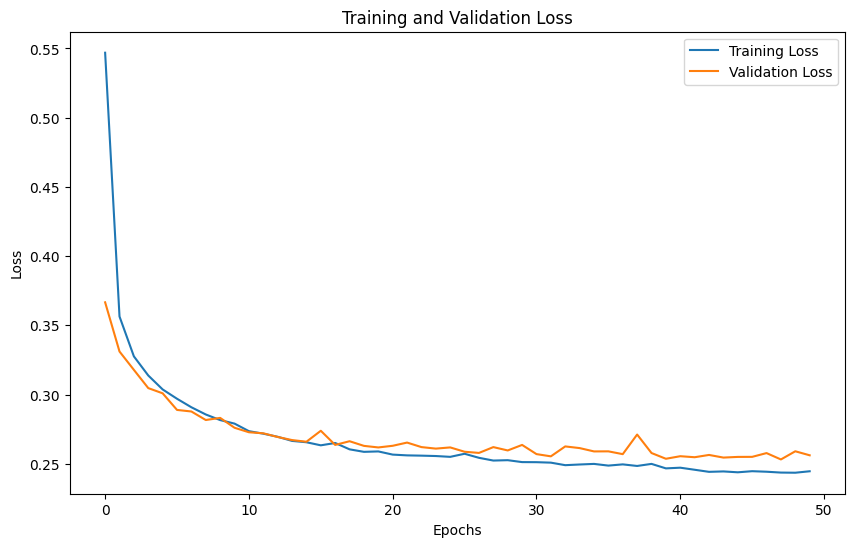

In [177]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

#features = df_not_scaled.drop(columns=['price', 'log_price'])
features = df_not_scaled[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target = df_not_scaled['log_price']
target_scaler = StandardScaler()
target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='sigmoid'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [178]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=target_scaler, logarithm=True)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.894274,0.332048,0.241458,1.197057,0.179021,29.453361
1,Scaled Target is inversed to real value,0.894274,0.090869,0.066078,0.010975,0.048991,0.811553
2,Target -> 10 ^ Target,0.938640,312917.535068,202986.731917,0.157443,120017.937500,11.331973


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,24.392819,44.772967,73.812038,97.043295,11.331973


Epoch 1/150


c:\Users\ALI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 99.9999 - val_loss: 99.9980
Epoch 2/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.9889 - val_loss: 99.8821
Epoch 3/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.7054 - val_loss: 98.5825
Epoch 4/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 97.5882 - val_loss: 92.5614
Epoch 5/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 89.0656 - val_loss: 79.6915
Epoch 6/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76.6763 - val_loss: 74.6646
Epoch 7/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.1657 - val_loss: 72.3159
Epoch 8/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69.4239 - val_loss: 69.5150
Epoch 9/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65.9627 - val_loss: 66.5345
Epoch 10/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.4123 - val_loss: 63.0153
Epoch 11/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.2897 - val_loss: 59.1538
Epoch 12/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

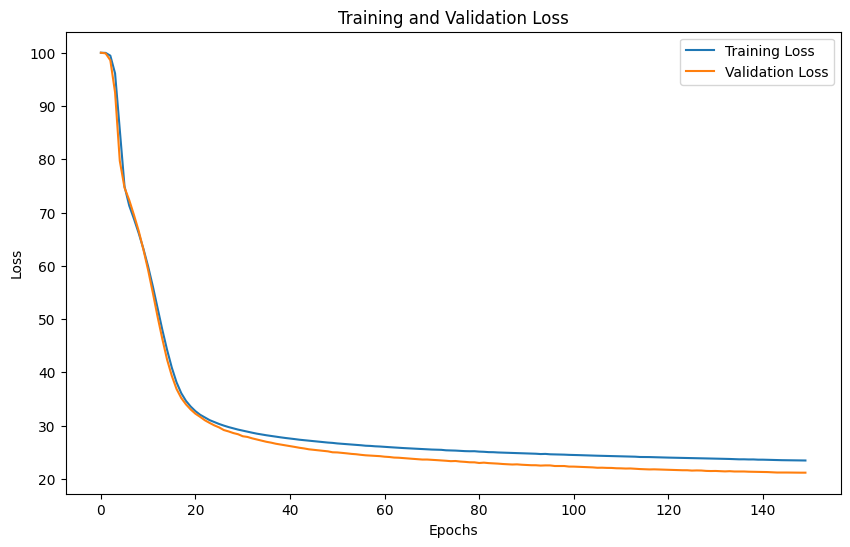

In [180]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

features = df_not_scaled.drop(columns=['price', 'log_price'])
# features = df_not_scaled[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
#                           "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasCooling']]
target = df_not_scaled['price']
target_scaler = StandardScaler()
#target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_percentage_error')

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [88]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=None, logarithm=False)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.645719,751898.918686,356821.002541,0.202249,158443.375,16.23406


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,18.901795,33.474129,59.556494,94.086589,16.23406


In [49]:
df_filtered = df_not_scaled[df_not_scaled['price'] < 2000000]

Epoch 1/150


c:\Users\ALI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 978878.9375 - val_loss: 1009057.6250
Epoch 2/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 971964.8750 - val_loss: 1005374.0000
Epoch 3/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 968063.0000 - val_loss: 961613.7500
Epoch 4/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 892880.2500 - val_loss: 739214.0000
Epoch 5/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 631516.8125 - val_loss: 470061.0625
Epoch 6/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 432341.0312 - val_loss: 379988.6562
Epoch 7/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 370156.9688 - val_loss: 320703.7188
Epoch 8/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 296157.1562 - val_loss: 274700.3438
Epoch 9/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 263308.0625 - val_loss: 243682.9688
Epoch 10/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 238759.5312 - val_loss: 224825.7188
Epoch 11/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

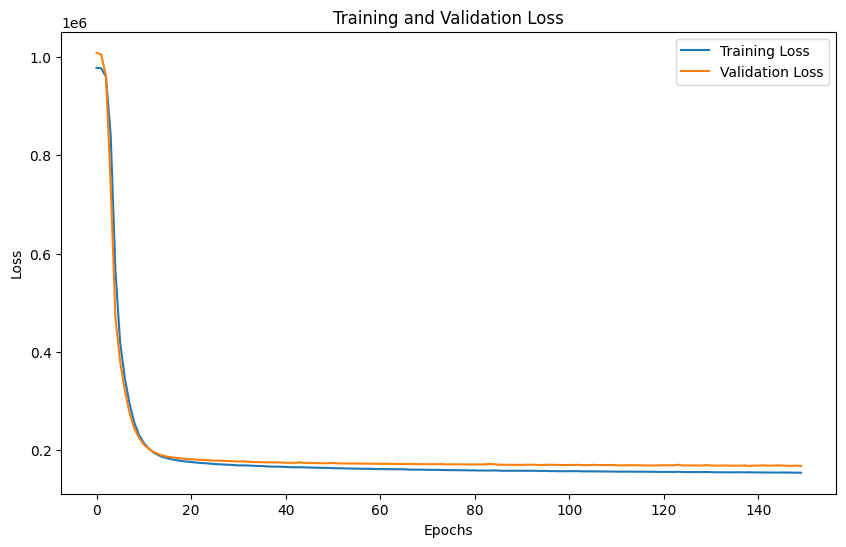

In [191]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# features = df_filtered.drop(columns=['price', 'log_price', 'lotAreaValue'])
features = df_filtered[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
                          "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasCooling']]
target = df_filtered['price']
target_scaler = StandardScaler()
#target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='linear'))

model.add(Dense(1))

model.compile(optimizer='adamw', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [193]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=None, logarithm=False)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.658511,233879.320928,158877.541535,0.177418,104236.125,11.605807


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,24.43038,44.43038,71.012658,95.189873,11.605807


Epoch 1/50


c:\Users\ALI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7212 - val_loss: 0.5402
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4836 - val_loss: 0.4457
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4359 - val_loss: 0.4112
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4005 - val_loss: 0.3919
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3864 - val_loss: 0.3815
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3721 - val_loss: 0.3770
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3753 - val_loss: 0.3694
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3550 - val_loss: 0.3672
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3563 - val_loss: 0.3613
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3422 - val_loss: 0.3578
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3413 - val_loss: 0.3587
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3232 - val_loss: 0.3561


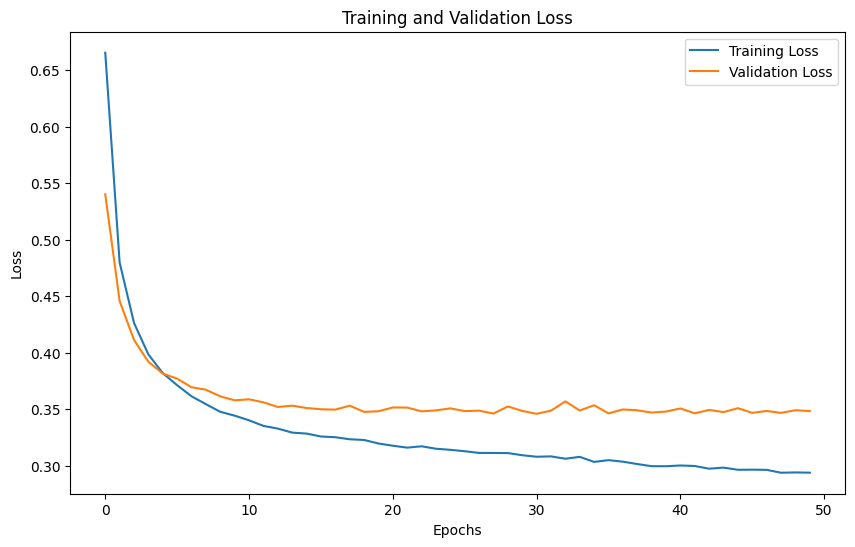

In [206]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

features = df_filtered.drop(columns=['price', 'log_price', 'lotAreaValue'])
# features = df_filtered[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
#                           "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
#                           'hasCooling']]
target = df_filtered['log_price']
target_scaler = StandardScaler()
target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='sigmoid'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [208]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=target_scaler, logarithm=True)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.760025,0.500124,0.349773,27.881587,0.241825,37.321417
1,Scaled Target is inversed to real value,0.760025,0.092196,0.064480,0.010911,0.044580,0.743636
2,Target -> 10 ^ Target,0.754419,198335.892307,138506.034691,0.157237,90056.531250,10.353448


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,27.848101,48.987342,74.936709,95.189873,10.353448
